# **Introducing Deep Learning**

Deep Learning is a subset of Machine learning. It was developed to have an architecture and functionality similar to that of a human brain. The human brain is composed of neural networks that connect billions of neurons. Similarly, a deep learning architecture comprises artificial neural networks that connect a number of mathematical units called neurons.

Deep Learning is capable of modeling complex problems that, in some cases, exceed human performance! With tremendous victories in the deep learning domain, a few great frameworks have emerged, intending to generalize deep learning processes from data pre-processing to model deployment. Though there are countable deep learning frameworks in practice, TensorFlow and PyTorch remain the preferred ones among practitioners and researchers over the years.

## **A Neuron or Unit**

A neuron is the fundamental building block of deep learning architecture. It is a simple mathematical operator that performs a weighted summation of its inputs. The inputs to a neuron can be either features of an input data point or the outputs of neurons of its previous neural layer. A neuron is also called a unit.

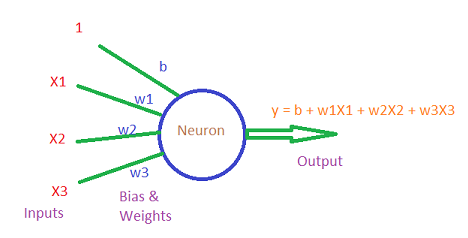

Inputs (X1, X2, X3) are multiplied by corresponding weights (w1, w2, w3) and added together to form the output (y). A bias (b) is necessarily included to represent the complement data that the input data fails to provide to demonstrate the actual pattern. Hence, the output is a linear function of the inputs.

## **Role of An Activation Function**

The output of a neuron is a linear function of its inputs. But the true pattern of data can not be explored just with a linear function. Hence, in most neurons, the linear output obtained by a neuron is transformed with an activation function to obtain a non-linear output. 



There are many non-linear activation functions in practical use. However, ReLU, tanh, sigmoid and softmax are the widely used functions. For instance, ReLU, the acronym of Rectified Linear Unit, sets negative values to zero leaving positive values as such.

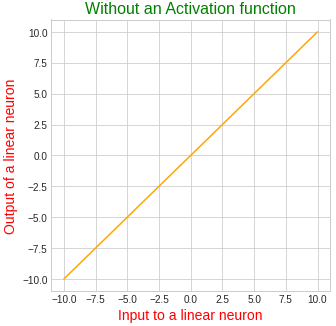

Linear output from a neuron without any activation function

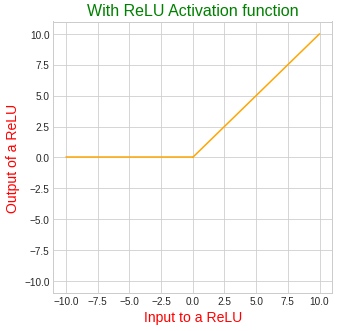

Therefore, a neuron can be viewed as an integration of a linear activation (weighted summation) function and a non-linear activation function if a non-linear activation function is employed.

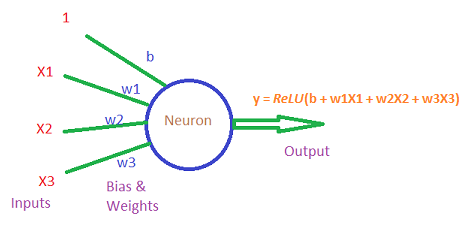

Bias and weights are known as the parameters of that neuron. There will be one bias for each neuron and a number of weights equal to the number of inputs to that neuron. Bias and weights are randomly assigned with some initial values during model building. During training, these values are updated suitably in iterative steps (termed technically as epochs). Finding the most suitable weights is called learning. At the end of training, the neural architecture and these weights are together called the trained Deep Learning Model.

## **A Neural Layer**

A collection of neurons that receive inputs from the same source is called a neural layer. Though each neuron in a neural layer receives the same inputs, they differ by weight. Thus each neuron attempts to explore different patterns hidden in the data.

## **XOR Gate Example**

We will be explaining about how to to build a neural network with basic mathematical computations using Python for XOR gate.

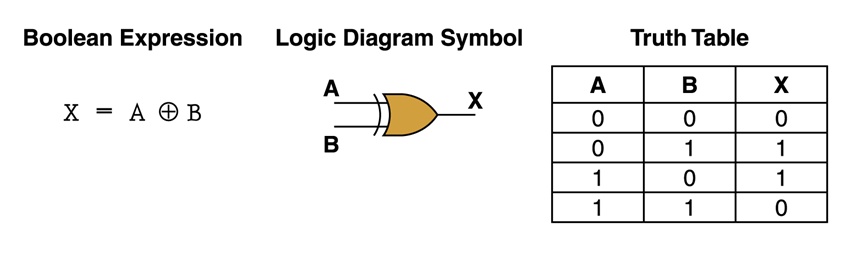

These are the libraries required to build a neural network in Python, which includes graphical representation libraries used to plot the sigmoid curve later.

In [ ]:
!python -m pip install pip --upgrade --user -q
!python -m pip install numpy pandas seaborn matplotlib scipy sklearn statsmodels --user -q

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import math

### **Activation Function And Its Derivation:**

The activation function we will be implementing here is the sigmoid activation function. This function will scale the values between 0 and 1 using an exponent ‘e’. It is also called as a Logistic Function.

Here is a representation of a sigmoid function:

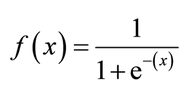

Let’s consider some examples using the above equation with the weights and see how it works:

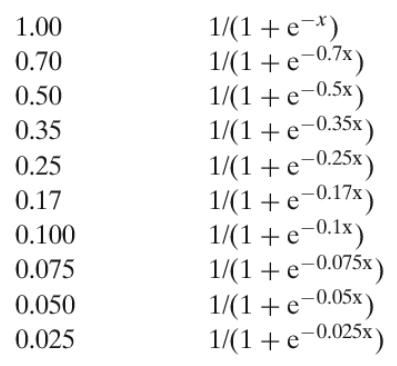

As it scales the values between 0 and 1, it helps the neural network to convert the data from linear to non-linear data. We need the derivative of the sigmoid function to calculate the error gradient required to correct it during the back propagation. We will be explaining about it during this setup:

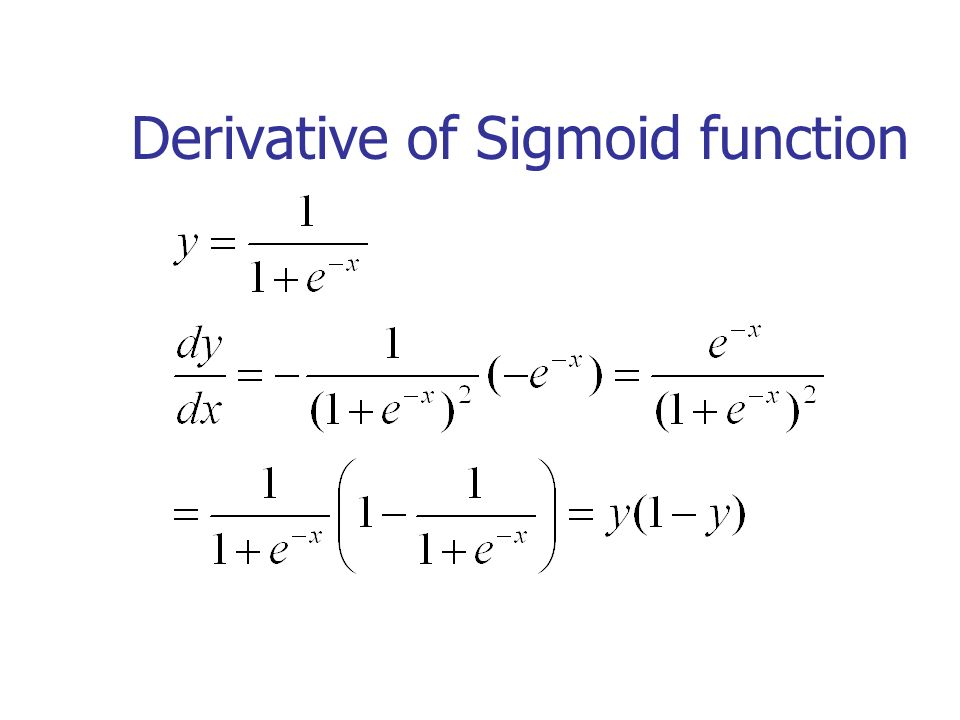

From the above derivation we can infer that the derivative of a sigmoid function is the sigmoid function itself with the mathematical equation.

Let’s write a function to implement the same in Python with its derivative:

In [ ]:
def sigmoid(x):
  """
  """
  return 1 / (1 + math.e ** -x)
  


def sigmoid_derivative(x):
  """
  """
  return (sigmoid(x)-(1-sigmoid(x))) #DERIVATIVE OF SIGMOID

Graphical representation of a sigmoid curve and its derivative:

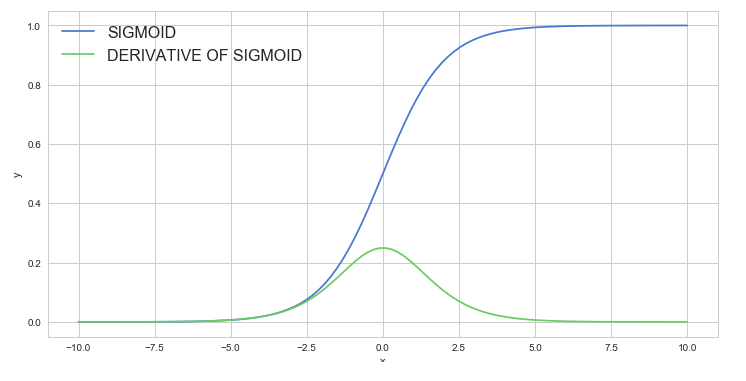

### **Setting Up The Neural Network:**

Let’s start with assigning the inputs to an object ‘X‘ which is nothing but the inputs of a XOR gate. And we’ll assign the output to the object ‘y‘.

In [ ]:
X = np.array([[0,0], [0,1], [1,0],[1,1]])
y = np.array([[0], [1], [1],[0]])

Now we need to design our neural network, since we have two values for our input ‘X’ and one value for output ‘y’. The network will have two input nodes and one output node, with a hidden layer of size 3 (you can consider any size you want here, make sure that the network is fully connected). Epochs are the number of iterations which have to  back propagate with the help of learning rate to get the actual value. Since it is a simple computational model, we are opting for a high number of epochs.

In [ ]:
epochs = 10000
input_size, hidden_size, output_size = 2,3,1
Learning_rate = 0.1

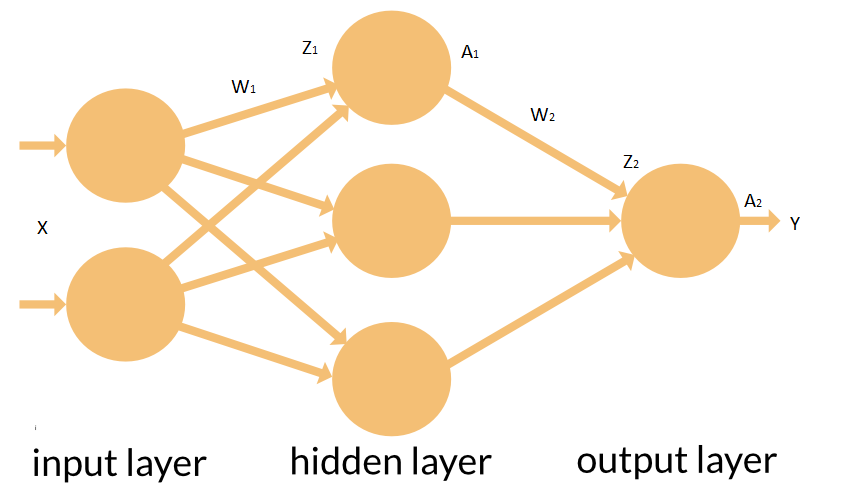

To start off, we need to initialise some weights. This is to let the neural network know where to start and how far it is from that actual output. We’ll be using some random numbers to start off with. These numbers are in the range of 0 and 1, and also follow uniform distribution. The input size, hidden size and the output size is used to obtain the shape of the matrix.

In [ ]:
W1 = np.random.uniform(size=(input_size, hidden_size))
W2 = np.random.uniform(size=(hidden_size, output_size))

The matrix containing weights are in the shape of the sizes initialised above. The output is as follows:

In [ ]:
W1

array([[0.89153377, 0.39232596, 0.49704186],
       [0.64962715, 0.07059557, 0.6147774 ]])

In [ ]:
W2

array([[0.57192413],
       [0.1748349 ],
       [0.23416544]])

Once the weights are initialised we can work on building the front propagation and the back propagation of our network.

### **Front Propagation:**

Below are the front propagation equations from the above diagram.

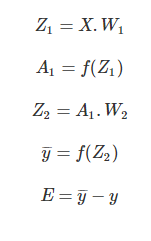

During front propagation, the input X is multiplied (dot product) with the W1 to initialise the beginning of the process, and passed through the activation function ‘σ’ sigmoid to get the output of the hidden layer. This output is then multiplied by W2 and the function ‘σ’ sigmoid to obtain the output. The python code is as follows:

In [ ]:
A1 = sigmoid(np.dot(X, W1))
yhat = np.dot(A1, W2)

In [ ]:
yhat

array([[0.49046223],
       [0.61819424],
       [0.65555688],
       [0.75455526]])

But the actual output is ‘y‘

In [ ]:
y

array([[0],
       [1],
       [1],
       [0]])

So, the yhat differs from y (actual output) by some decimal values. This is called as an error ‘E‘.

Now let us look at it by how much our output differs. All we need to find is:

**E = yhat – y**

In [ ]:
E = yhat - y

In [ ]:
E

array([[ 0.49046223],
       [-0.38180576],
       [-0.34444312],
       [ 0.75455526]])

### **Back Propagation:**

This is the process in which the error is corrected in every iteration (epochs). We need to find the gradient at which the error needs to be corrected. Let us find the derivative of the output with respect to the weights. The derivative tell us by how much the we need to change the weights through each epoch in order to reach the actual output.

Let us find the derivative of Error (E ) with respect to W2 from the front propagation equations.

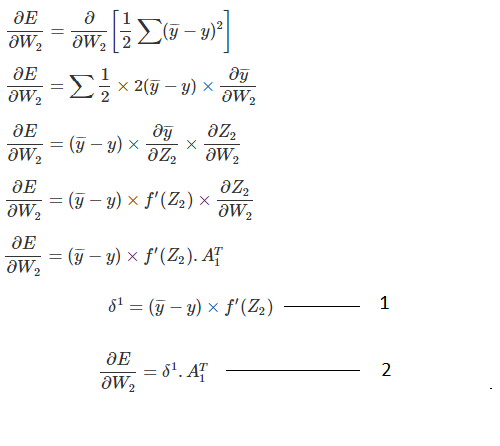

Now let us compute the Error (E ) with respect to W1.

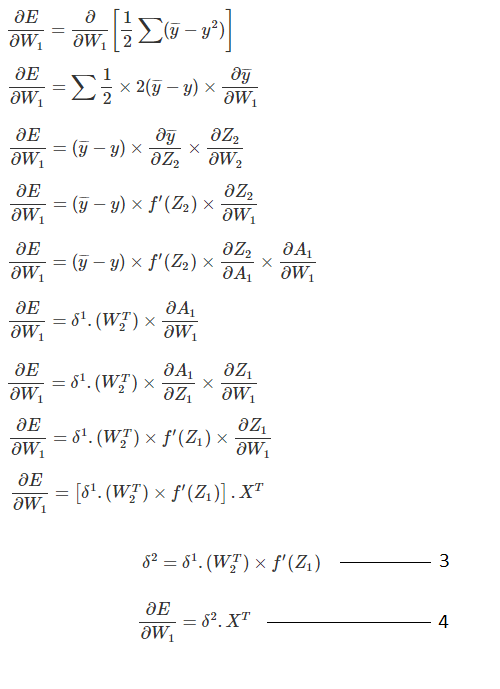

Once we compute this, we can work on building the back propagation equations in Python.

In [ ]:
delta1 = E * Learning_rate #From equation 1
W2 += A1.T.dot(delta1) #From equation 2
delta2 = delta1.dot(W2.T) * sigmoid_derivative(A1) #From Equation 3
W1 += X.T.dot(delta2) #From Equation 4

The front and back propagation equations are built. Let us see the error change through the iterations. If the error decreases, then our neural network is working towards finding the right answer.

In [ ]:
for i in range(0, 1):
  A1 = sigmoid(np.dot(X, W1))
  yhat = np.dot(A1, W2)
  E = yhat-y
  print("error sum", E.sum()/4)
  delta1 = E * Learning_rate #From equation 1
  W2 += A1.T.dot(delta1) #From equation 2
  delta2 = delta1.dot(W2.T) * sigmoid_derivative(A1) #From Equation 3
  W1 += X.T.dot(delta2) #From Equation 4


error sum 0.19535754365013475


Now let us test the model with an input and see how accurate it is.

In [ ]:
X_test = [0,1]
A1 = sigmoid(np.dot(X_test, W1))
np.dot(A1, W2)

array([0.77986137])

Finally we have our result, which is very close to 1. This is how we teach a neural network to understand the mistake and make small changes in every iteration to reach the actual value. Here we have built a very simple network which has less computations in front and back propagation, which is why it is faster.

# **Related Articles --**

> * [Deep Learning Frameworks](https://analyticsindiamag.com/deep-learning-frameworks/)
> * [Types of Activation Functions](https://analyticsindiamag.com/most-common-activation-functions-in-neural-networks-and-rationale-behind-it/)
> * [Maths for Deep Learning](https://analyticsindiamag.com/beginners-guide-neural-network-math-python/)
> * [Deep Learning Using Tensorflow Keras](https://analyticsindiamag.com/deep-learning-using-tensorflow-keras/)